In [211]:
# import the necessary packages
from scipy.spatial import distance as dist
import numpy as np
import mahotas
import cv2
import imutils
import matplotlib.pyplot as plt
import pandas as pd
import math
import random as rng
from sklearn.metrics.pairwise import pairwise_distances
from PIL import Image

### MOMENTOS ZERNIKE

In [199]:
def describe_shapes(image):
    shapeFeatures = []
  
    # Preprocesamiento: escala de grises, blurring y umbralizar
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (13, 13), 0)
    thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)[1]
  
    # Dilatamos y erosionamos para cerrar huecos en las formas
    thresh = cv2.dilate(thresh, None, iterations=4)
    thresh = cv2.erode(thresh, None, iterations=2)
  
    # Detección de contornos
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
  
    for c in cnts:
        # Creamos mask para el contorno
        mask = np.zeros(image.shape[:2], dtype="uint8")
        cv2.drawContours(mask, [c], -1, 255, -1)
  
        # Extraemos las coordenadas de la región de interés con la mask
        (x, y, w, h) = cv2.boundingRect(c)
        roi = mask[y:y + h, x:x + w]
  
        # Calculamos los momentos zernike de la región de interés y hacemos append a una lista
        features = mahotas.features.zernike_moments(roi, cv2.minEnclosingCircle(c)[1], degree=8)
        shapeFeatures.append(features)
  
    # Devolvemos los contornos y la lista de momentos Zernike
    return (cnts, shapeFeatures)

In [850]:
#Iteramos por la lista de logos para hacer el imread y el describe_shapes de cada uno de ellos (sacar momentos zernike)
logo_input="{value}"
logoList=['android','gmail','mc','movistar','nike','shell','twitter','whats']
for i in range(len(logoList)):
    exec("ref_"+logo_input.format(value=logoList[i])+" = cv2.imread(f'Logos/{logoList[i]}Logo.PNG')")
    exec("(cnts"+logo_input.format(value=logoList[i])+", "+logo_input.format(value=logoList[i])+"Features) = describe_shapes(ref_"+logo_input.format(value=logoList[i])+")")

In [913]:
# Carga de imagen a comparar con la referencia
shapesImage = cv2.imread("Collages/C15.PNG")
(cnts, shapeFeatures) = describe_shapes(shapesImage)

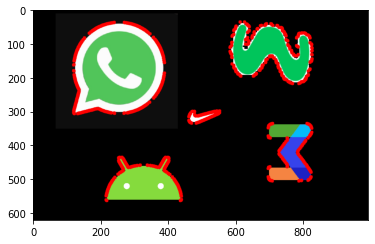

In [914]:
# Dibujamos los contornos calculados con las coordenadas obtenidas en describe_shape
for x in range(len(cnts)):
        for t in range(len(cnts[x])):
            shapesImage=cv2.circle(shapesImage, (cnts[x][t][0][0],cnts[x][t][0][1]), radius=0, color=(255, 0, 0), thickness=10)
plt.imshow(shapesImage)

In [915]:
#Operamos cada uno de los momentos zernike de los logos (las referencias) con cada uno de los momentos zernike de los contornos de la imagen cargada

#Luego conseguimos un vector de distancia por cada uno de los contornos que contienen la distancia euclídea a cada uno de los logos de referencia

logo_input="{value}"
cnts_input="{value}"
D_logos=[]
i_logos=[]
for m in range(len(cnts)):
    exec("min_dist_"+cnts_input.format(value=m)+"=[]")
    

for a in range(len(logoList)):   
    exec("D = dist.cdist("+logo_input.format(value=logoList[a])+"Features, shapeFeatures)")
    D_logos.append(D)
    i = np.argmin(D_logos[a], axis=1)
    i_logos.append(i)
    
for m in range(len(logoList)):
    for a in range(len(cnts)): 
        exec("min_dist_"+cnts_input.format(value=a)+".append(np.amin(D_logos[m][0]["+cnts_input.format(value=a)+"]))")

In [916]:
#Con los vectores de distancia escogemos que valor de distancia es el menor para cada contorno y lo asignamos a uno de los logos de referencia
#Una menor distancia euclídea entre momentos implica un mayor parecido, por lo que vemos la posición de la menor distancia en los vectores obtenidos para imprimir el nombre de la compañia del logo elegida en la imagen

cnts_input="{value}"
for element in range(len(cnts)):   
    exec("box = cv2.minAreaRect(cnts["+cnts_input.format(value=element)+"])")
    box = np.int0(cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box))
    cv2.drawContours(shapesImage, [box], -1, (0, 255, 0), 2)
    exec("(x, y, w, h) = cv2.boundingRect(cnts["+cnts_input.format(value=element)+"])")
    exec("cv2.putText(shapesImage, f'{logoList[np.argmin(min_dist_"+cnts_input.format(value=element)+")]}', (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9,(0, 255, 0), 3)")
    

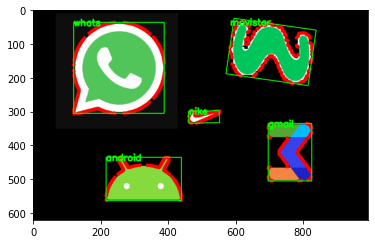

In [917]:
plt.imshow(shapesImage)

### FIN MOMENTOS ZERNIKE

### HU MOMENTS

In [110]:
def describe_shapes_hu(image):
    
    shapeFeatures = []
  
    # Preprocesamiento: escala de grises, blurring y umbralizar
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (13, 13), 0)
    thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)[1]
  
    # Dilatamos y erosionamos para cerrar huecos en las formas
    thresh = cv2.dilate(thresh, None, iterations=4)
    thresh = cv2.erode(thresh, None, iterations=2)
  
    # Detección de contornos
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
  
    for c in cnts:
        # Creamos mask para el contorno
        mask = np.zeros(image.shape[:2], dtype="uint8")
        cv2.drawContours(mask, [c], -1, 255, -1)
  
        # Extraemos las coordenadas de la región de interés con la mask
        (x, y, w, h) = cv2.boundingRect(c)
        roi = mask[y:y + h, x:x + w]
  
        # Calculamos los momentos Hu de la región de interés y hacemos append a una lista
        moments=cv2.moments(roi)
        huMoments=cv2.HuMoments(moments).flatten()
        shapeFeatures.append(huMoments)
  
    # Devolvemos los contornos y la lista de momentos Hu
    return (cnts, shapeFeatures)

In [111]:
#Definimos una función para hacer la computación de distancias euclídeas entre momentos
def compute_distances(refFeatures, shapeFeatures):
    distances=[]
    
    for x in range(len(shapeFeatures)):
        D= pairwise_distances(refFeatures[0].reshape(1, -1), shapeFeatures[x].reshape(1, -1))
        distances.append(D)
        
    return distances

In [112]:
#Iteramos por la lista de logos para hacer el imread y el describe_shapes_hu de cada uno de ellos (sacar momentos Hu)

logo_input="{value}"
logoList=['android','gmail','mc','movistar','nike','shell','twitter','whats']
for i in range(len(logoList)):
    exec("ref_"+logo_input.format(value=logoList[i])+" = cv2.imread(f'Logos/{logoList[i]}Logo.PNG')")
    exec("(cnts"+logo_input.format(value=logoList[i])+", "+logo_input.format(value=logoList[i])+"Features) = describe_shapes_hu(ref_"+logo_input.format(value=logoList[i])+")")

In [113]:
#A todos los momentos Hu de los logos de referencia aplicamos la escala logarítmica para poder hacer el matching de distancias euclídeas
for p in range(len(logoList)):
    for w in range(7):
        exec(""+logo_input.format(value=logoList[p])+"Features[0][w] = -np.sign("+logo_input.format(value=logoList[p])+"Features[0][w])*np.log10(np.abs("+logo_input.format(value=logoList[p])+"Features[0][w]))")

In [192]:
#Se hace el imread de la imagen a comparar 

shapesImage = cv2.imread("Collages/C15.PNG")
(cnts, shapeFeatures) = describe_shapes_hu(shapesImage)

for a in range(len(shapeFeatures)):
    for i in range(0,7):
        shapeFeatures[a][i] = -np.sign(shapeFeatures[a][i])*np.log10(np.abs(shapeFeatures[a][i]))

In [193]:
cnts_input="{value}"

for m in range(len(logoList)):
    exec("distance_logo_"+cnts_input.format(value=m)+"=[]")

for m in range(len(logoList)):
    exec("distance_logo_"+cnts_input.format(value=m)+"=compute_distances("+logo_input.format(value=logoList[m])+"Features,shapeFeatures)")
            

In [194]:
cnts_input="{value}"

for m in range(len(cnts)):
    exec("min_dist_"+cnts_input.format(value=m)+"=[]")
    
for m in range(len(logoList)):
    for a in range(len(cnts)): 
        exec("min_dist_"+cnts_input.format(value=a)+".append(distance_logo_"+cnts_input.format(value=m)+"["+cnts_input.format(value=a)+"][0][0])")

In [195]:
cnts_input="{value}"
for element in range(len(cnts)):   
    exec("box = cv2.minAreaRect(cnts["+cnts_input.format(value=element)+"])")
    box = np.int0(cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box))
    cv2.drawContours(shapesImage, [box], -1, (0, 255, 0), 2)
    exec("(x, y, w, h) = cv2.boundingRect(cnts["+cnts_input.format(value=element)+"])")
    exec("cv2.putText(shapesImage, f'{logoList[np.argmin(min_dist_"+cnts_input.format(value=element)+")]}', (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9,(0, 255, 0), 3)")

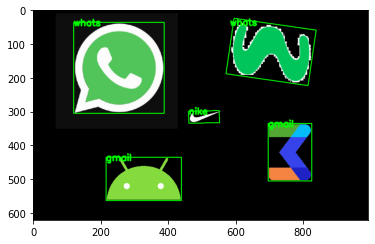

In [196]:
plt.imshow(shapesImage)

### FIN HU MOMENTS

### RECORTE DE IMÁGENES SEGÚN EL CONTORNO

In [242]:
#Esta primera parte sirve para la extracción de coordenadas de los contornos de los logos del dataset

shapesImage = cv2.imread("Collages/C13.png")
im = Image.open("Collages/C13.png")
(cnts, _) = describe_shapes(shapesImage)

In [243]:
#Con dichas coordenadas podemos crear un rectángulo a su alrededor y con las coordenadas del rectángulo creamos nuevas imágenes recortadas en las que solo tenemos los logos

cnts_input="{value}"
for i in range(len(cnts)):    
    box = cv2.minAreaRect(cnts[i])
    (x, y, w, h) = cv2.boundingRect(cnts[i])
    im1 = im.crop((x, y, x+w, y+h))
    exec("im1.save('Contours/C13/cnts"+cnts_input.format(value=i)+".PNG')")

### SIFT FEATURES Y MATCHING

In [262]:
#Esta es la función para aplicar sift según la decisión del contorno y del logo que se quiere usar como referencia

def aplicar_sift(path, num_cnts, logoRef):

    path=path+'/cnts'+ str(num_cnts)+'.PNG'
    print(path)
    img1 = cv2.imread(logoRef)  
    img2 = cv2.imread(str(path))
         
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
         
    sift = cv2.SIFT_create()

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
    
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
    
    plt.imshow(img3)

Contours/C1/cnts4.PNG


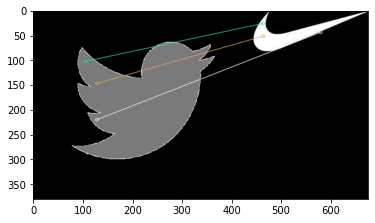

In [266]:
aplicar_sift('Contours/C1', 4, 'Logos/twitterLogo.PNG')

### ORB FEATURES Y MATCHING

In [264]:
#Esta es la función para aplicar orb según la decisión del contorno y del logo que se quiere usar como referencia

def aplicar_orb(path, num_cnts, logoRef):

    path=path+'/cnts'+ str(num_cnts)+'.PNG'
    print(path)
    img1 = cv2.imread(logoRef)  
    img2 = cv2.imread(str(path))
         
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
         
    orb = cv2.ORB_create()

    keypoints_1, descriptors_1 = orb.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = orb.detectAndCompute(img2,None)
    
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
    
    plt.imshow(img3)

Contours/C1/cnts4.PNG


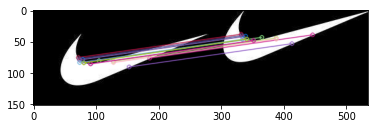

In [265]:
aplicar_orb('Contours/C1', 4, 'Logos/nikeLogo.PNG')